<a href="https://colab.research.google.com/github/joshlensing/Food-Sales-Predictions/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlet Sales of Food Items
- Joshua Lensing

## Loading Data

In [1]:
import pandas as pd

In [2]:
filename = '/content/sales_predictions.csv'
df_sales = pd.read_csv(filename)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Based on the first look of the data, it appears that there are some columns that may contain information that is not needed or would be unhelpful. There are also a couple columns with missing data but I will determine if that column is needed or not during my cleaning.

## Data Cleaning

In [4]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


I first want to find out the size of the data, so I will call the shape of the dataframe to determine how many rows and columns there are.

In [5]:
df_sales.shape

(8523, 12)

There are 8,523 rows and 12 columns. Next I want to find out the datatype of the values in each column.

In [6]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

It looks there are integers, floats, and objects contained within the columns of the data set.

I'm now going to check the dataset for any duplicated rows. If there are any, I will drop them from the dataset.

In [7]:
df_sales.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

Because the size of the dataset is too large to display all rows, I am still unsure if the dataset contains duplicates. I will display the sum of duplicates in order to truly determine if there are any.

In [8]:
df_sales.duplicated().sum()

0

It looks like there are no duplicated rows in the set! From here, I want to identify the columns that have missing data. Based on the information from df_sales.info(), we can see that there are 2 columns with missing values: **Item_Weight** and **Outlet_Size**.
- I want to confirm this by running the data and checking for all values that are missing. The dataframe will return boolean values in place of the values in the dataset.

In [9]:
df_sales.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are 1463 missing values in **Item_Weight** and 2410 missing values in **Outlet_Size**. We'll first address the **Item_Weight** column. The values in that column are floats, so I will take the average of the values in the column and impute the value for the missing values.

In [11]:
df_sales['Item_Weight'].fillna(value = df_sales['Item_Weight'].mean(), inplace = True)
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Now I want to fill in the missing data for the **Outlet_Size** column. There are 3 different values that exist in the column: 'High', 'Medium', 'Small.' This set of values is catergorical, not numerical, so finding the mean would not be the logical choice. Instead, I will use mode in order to use the data that most appears in the column, as the likelihood of that value in that column is greater.

In [12]:
outlet_size_mode = df_sales['Outlet_Size'].mode()
df_sales['Outlet_Size'].fillna(outlet_size_mode, inplace=True)

In [13]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

After attempting to replace the **Outlet_Size** with the mode of the data, it appears that there may be more than 3 category options. I will run a value_counts for the column in order to determine the names of the values.

In [14]:
df_sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

It still appears that using the mode for the values in the column does not fill in the missing data. Based on the value_counts, 'Medium' is the most frequent value used, so I will instead impute 'Medium' in for the missing values.

In [15]:
df_sales['Outlet_Size'].fillna('Medium', inplace=True)

In [16]:
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

We can see that imputing the value directly allowed me to fill in the missing data values in the column.

### Deleting Unnecessary Columns

I want to now delete any columns in the dataset that are unnecessary or have values that are unique to each row, as these will not help when the data is run through machine learning.

In [17]:
df_sales.drop(columns = ['Item_Identifier', 'Item_Visibility', 'Outlet_Identifier', 'Outlet_Location_Type'], inplace=True)
df_sales.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,Dairy,249.8092,1999,Medium,Supermarket Type1,3735.1380
1,5.92,Regular,Soft Drinks,48.2692,2009,Medium,Supermarket Type2,443.4228
2,17.50,Low Fat,Meat,141.6180,1999,Medium,Supermarket Type1,2097.2700
3,19.20,Regular,Fruits and Vegetables,182.0950,1998,Medium,Grocery Store,732.3800
4,8.93,Low Fat,Household,53.8614,1987,High,Supermarket Type1,994.7052


**Item_Identifier** contained unique values to each row, so they were deleted. I also deleted **Outlet_Identifier** for the same reason, and although it was present in more than one row, it was not prevalent enough to keep it. **Outlet_Location_Type** did not seem necessary as we already have information on the types of outlets.  And for the final column **Item_Visibility**, the data did not seem identify anything of importance with the data, and the values of each were very different from one another, so it was deleted as well.

Next I want to sort throught the columns with catergorical values in order to determine if there are any mistakes or values that have been named differently from the expected value.

In [18]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Since there are inconsistencies, I will replace each value with either 'Low Fat' or 'Regular.' From the value counts, I can assume that 'LF' and 'low fat' can be converted to 'Low Fat', while 'reg' can be converted to 'Regular'.

In [19]:
df_sales.replace(['LF', 'low fat'], ['Low Fat', 'Low Fat'], inplace=True)
df_sales.replace(['reg'], ['Regular'], inplace=True)
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

I will now check **Item_Type**.

In [20]:
df_sales['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

It appears that all the values in 'Item_Type' seem consistent. I now will check **Outlet_Type**.

In [21]:
df_sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

The values in the categorical columns have been checked for consistency, so the dataframe appears set. Lastly, I want to run a statistics summary for the numerical columns (mean, median, mode, etc.).

In [22]:
df_sales.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,Dairy,249.8092,1999,Medium,Supermarket Type1,3735.1380
1,5.92,Regular,Soft Drinks,48.2692,2009,Medium,Supermarket Type2,443.4228
2,17.50,Low Fat,Meat,141.6180,1999,Medium,Supermarket Type1,2097.2700
3,19.20,Regular,Fruits and Vegetables,182.0950,1998,Medium,Grocery Store,732.3800
4,8.93,Low Fat,Household,53.8614,1987,High,Supermarket Type1,994.7052


In [23]:
df_sales[{'Item_Weight', 'Item_MRP', 'Item_Outlet_Sales'}].describe().round(2)

,Item_Outlet_Sales,Item_MRP,Item_Weight
count,8523.00,8523.00,8523.00
mean,2181.29,140.99,12.86
std,1706.50,62.28,4.23
min,33.29,31.29,4.56
25%,834.25,93.83,9.31
50%,1794.33,143.01,12.86
75%,3101.30,185.64,16.00
max,13086.96,266.89,21.35


I rounded the values to 2 decimal places in order to clean up the numerical values. I also did not include the year in the statistics summary as they act more as categories than they do numerically.

## Exploratory Visuals

In order to create graphs that represent parts of the dataset that I want to explore, I need to import libraries that allow me to do so.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The 3 visuals I am going to use to display values from the dataset are histoplot, boxplot, and heatmap.

___

From the dataframe, **df_sales**, I want to visualize the distribution of  outlet sales.

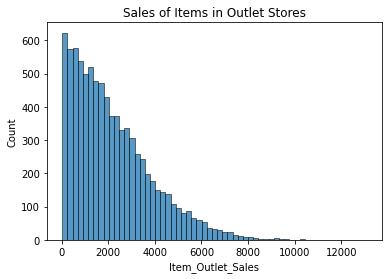

In [25]:
ax = sns.histplot(data=df_sales, x='Item_Outlet_Sales')

ax.set(title='Sales of Items in Outlet Stores');

This distribution shows the total number of sales for every item and every outlet type. It is a very generic graph that doesn't give us very much information. With that said, we could gather from this graph that there are a small number of large sales numbers in comparison to smaller sales. But again, it is very generic and doesn't give us much to work with.

___

Instead of pulling all sales from all supermarkets, it would be helpful to look at the finer details. One way to do this would be to filter the data by outlet type and the item type. By doing this, we can compare what sales look like between the different types of outlets for a certain item. Because fruits and vegetable sales are prevalent in the data, we can explore and compare the dataset by filtering out this item.

In [26]:
fruitsandveggies = df_sales['Item_Type'] == 'Fruits and Vegetables'


In [27]:
df_produce = df_sales.loc[fruitsandveggies,:]

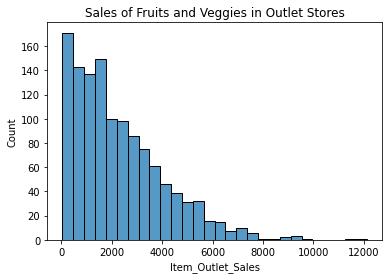

In [28]:
ax = sns.histplot(data=df_produce, x='Item_Outlet_Sales')

ax.set(title='Sales of Fruits and Veggies in Outlet Stores');

This data looks very similar to the data we pulled for all item types and the outlet sales. Based on their similarities, we might see that fruit and vegetable sales play a large role in the amount of money made by the outlets in relation to other products. I can test this with another item type that is not as large as fruits and vegetables.

In [29]:
meatsales = df_sales['Item_Type'] == 'Meat'
df_meat = df_sales.loc[meatsales,:]

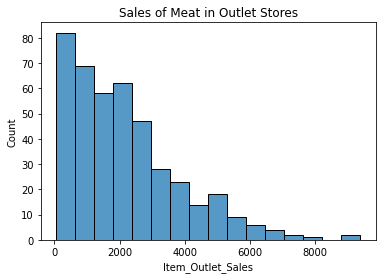

In [30]:
ax = sns.histplot(data=df_meat, x='Item_Outlet_Sales')

ax.set(title='Sales of Meat in Outlet Stores');

Meat also appears to play a factor in determining total out sales as well as the graph is similar to our first outlet sales graph.

___

Now we can explore the concentration of outlet sales numbers and if there any outliers in the sales numbers.

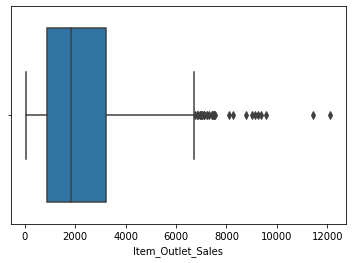

In [31]:
sns.boxplot(data=df_produce, x='Item_Outlet_Sales');

Based on the inner and outer quartile range of our data (blue box in the graph) we can see that half of our data is ranges between sales of 1000-3000 dollars. Outliers exist beyond sales of almost $7000, which tells us that those sales aren't very common.

___

Our last visual to see how the data relates to one another is by using a Heatmap. Instead of focusing on the distriubtion of data for one column of values, a heatmap will explore how the values in each row may correlate and have an affect on one another.

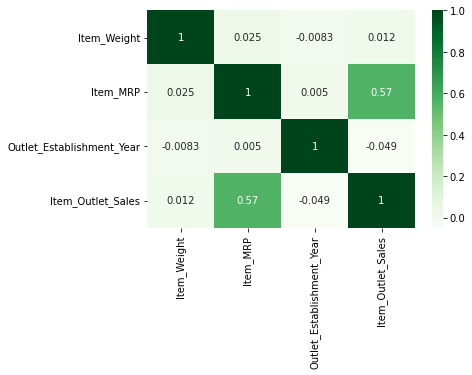

In [32]:
corr = df_sales.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

Each item has a strong correlation to itself, of course, as any number over 0.7 in the boxes is considered a 'strong' correlation. The only other correlation that is significant is the item price, or Item_MRP in the data, and the outlet sales. This correlation is considered moderate with a value of 0.57.

## Explanatory Visuals

Next I will take a deeper dive into the dataset in order to create better visual representations of what the dataset is telling us. From the correlation heatmap above, I can see the item MRP is moderately correlated to item outlet sales, but the graph may be hard to understand to a certain degree if you don't know what you're looking at. In order to get a better understanding of how the twp are correlated, I will create a scatterplot of the produce dataset that will better visualize it.

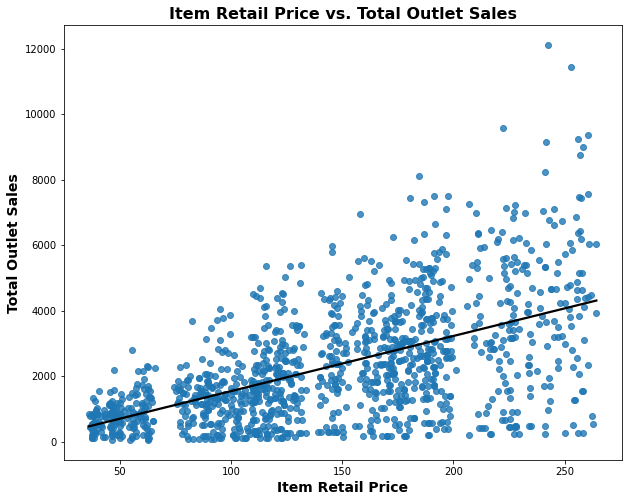

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(data=df_produce, x='Item_MRP', y='Item_Outlet_Sales', ci = None, line_kws = {'color': 'black', 'ls': '-'});
ax.set_xlabel('Item Retail Price', fontsize = 14, fontweight = 'bold');
ax.set_ylabel('Total Outlet Sales', fontsize = 14, fontweight = 'bold');
ax.set_title('Item Retail Price vs. Total Outlet Sales', fontsize = 16, fontweight = 'bold');

This regplot allows me to see that as the retail price of an item increases, so does the the total outlet sales increases. The higher price of the item may have an affect on what the outlet does in total sales.

___

Another set of data that I want to visualize is the total sales for outlet type. This will give me a great indication of what sales are like between the 4 different outlet types in the dataset and how they differ.

In [68]:
outlet_sales = df_sales.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().round(2)
outlet_sales

Outlet_Type
Grocery Store          368034.27
Supermarket Type1    12917342.26
Supermarket Type2     1851822.83
Supermarket Type3     3453926.05
Name: Item_Outlet_Sales, dtype: float64

In [69]:
outlet_type = np.array(outlet_sales.index)
outlet_type

array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

In [70]:
sales_numbers = np.array(outlet_sales.values)
sales_numbers

array([  368034.27, 12917342.26,  1851822.83,  3453926.05])

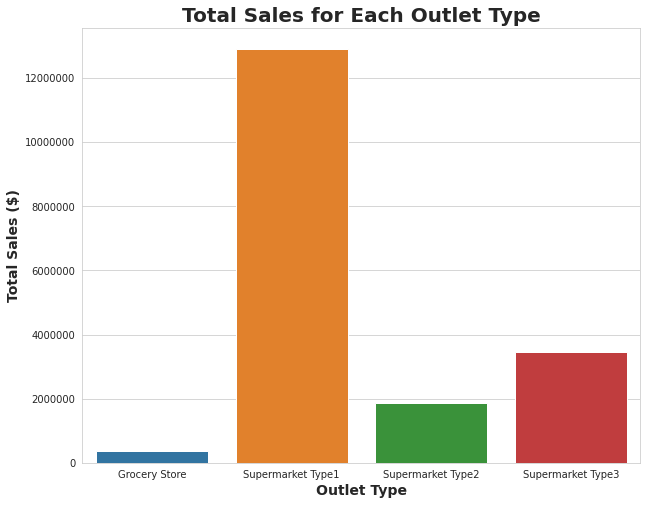

In [84]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(data=df_sales, x=outlet_type, y=sales_numbers);
ax.set_xlabel('Outlet Type', fontsize = 14, fontweight = 'bold');
ax.set_ylabel('Total Sales ($)', fontsize = 14, fontweight = 'bold');
ax.set_title('Total Sales for Each Outlet Type', fontsize = 20, fontweight = 'bold');

ax.grid(axis='y', alpha=1);
ax.ticklabel_format(axis='y', style='plain');

Supermarket Type 1 has the largest number of total sales. More so than the other 3 types combined. Grocery stores had the lowest number of total sales.

- Source used for gridlines: https://stackoverflow.com/questions/1726391/matplotlib-draw-grid-lines-behind-other-graph-elements#:~:text=You%20can%20try%20to%20use%20one%20of%20Seaborn%27s,will%20get%20behind%20but%20the%20looks%20are%20nicer.

- Source used for removing scientific notation: https://stackoverflow.com/questions/65015091/remove-scientific-notation-from-catplot-in-seaborn